In [1]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(60000, 28, 28, 1)
test_x = test_x.reshape(10000, 28, 28, 1)

train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)

In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               819456    
__________

In [7]:
history = model.fit(train_x, train_y, validation_split=0.2, epochs=5, batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 209us/step - loss: 0.2020 - acc: 0.9366 - val_loss: 0.0633 - val_acc: 0.9818
Epoch 2/5
48000/48000 [==============================] - 8s 175us/step - loss: 0.0574 - acc: 0.9822 - val_loss: 0.0443 - val_acc: 0.9875
Epoch 3/5
39680/48000 [=======================>......] - ETA: 1s - loss: 0.0397 - acc: 0.9874

48000/48000 [==============================] - 9s 178us/step - loss: 0.0389 - acc: 0.9875 - val_loss: 0.0527 - val_acc: 0.9842
Epoch 4/5
48000/48000 [==============================] - 9s 177us/step - loss: 0.0311 - acc: 0.9899 - val_loss: 0.0350 - val_acc: 0.9901
Epoch 5/5
48000/48000 [==============================] - 8s 177us/step - loss: 0.0234 - acc: 0.9922 - val_loss: 0.0299 - val_acc: 0.9914


In [8]:
score, acc = model.evaluate(test_x, test_y)

print("Test score: ", score)
print("Test accuracy: ", acc)

10000/10000 [==============================] - 1s 133us/step
Test score:  0.022873580033148756
Test accuracy:  0.9926


In [9]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


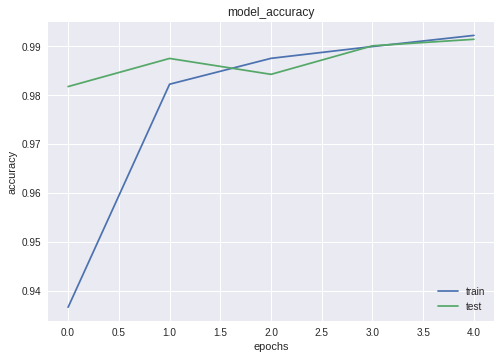

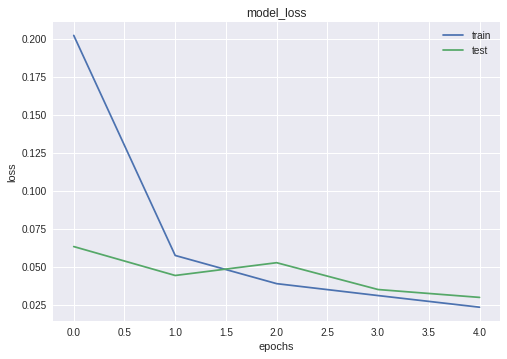

In [10]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model_loss")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()